In [ ]:
import numpy as np 
import pandas as pd 

from random import randint

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

In [ ]:
flowers_path = '/content/drive/MyDrive/Flowers-Dataset'

In [ ]:
classes = os.listdir(flowers_path)
classes

['flowers']

In [ ]:
image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.25,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.25,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)

Found 3070 files belonging to 1 classes.
Using 2303 files for training.
Found 3070 files belonging to 1 classes.
Using 767 files for validation.


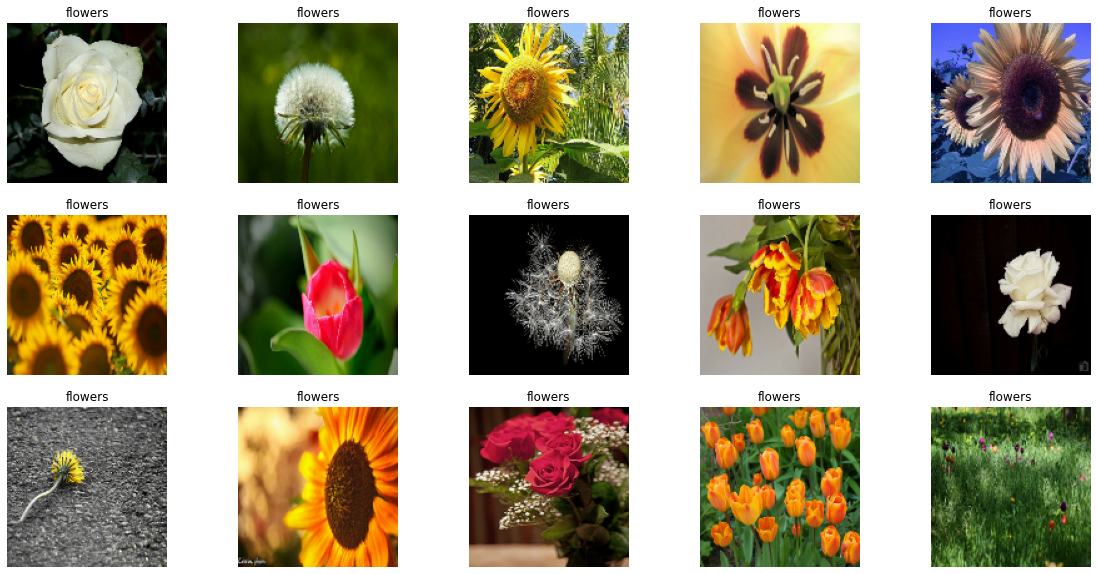

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])
        plt.axis("off")
plt.show()

In [ ]:
input_shape = (128, 128, 3)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(200, activation="relu"),
        layers.Dense(200, activation="relu"),
     layers.Dense(len(classes), activation="softmax"),
    ]
)
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 200)               9830600   
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 9,871,001
Trainable params: 9,871,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=15, batch_size=5000, verbose=1, validation_data=val_ds)

Epoch 1/15
72/72 [==============================] - 194s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
72/72 [==============================] - 13s 174ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
72/72 [==============================] - 13s 174ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
72/72 [==============================] - 13s 169ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
72/72 [==============================] - 13s 170ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
72/72 [==============================] - 13s 172ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
72/72 [==============================] - 13s 175ms/step - loss: 0.0000e+00 - accuracy

In [ ]:
history = model.fit(train_ds, epochs=15, batch_size=5000, verbose=1, validation_data=val_ds)

Epoch 1/15
72/72 [==============================] - 13s 176ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
72/72 [==============================] - 17s 235ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
72/72 [==============================] - 13s 171ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
72/72 [==============================] - 13s 169ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
72/72 [==============================] - 13s 174ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
72/72 [==============================] - 13s 174ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
72/72 [==============================] - 13s 172ms/step - loss: 0.0000e+00 - accura

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

xepochs = [n for n in range(len(history.history['accuracy']))]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy over time", "Loss over time"))

for metric in ['accuracy', 'val_accuracy']:
    fig.add_trace(go.Scatter(x=xepochs, y=history.history[metric], mode='lines+markers', name=metric), row=1, col=1)

for metric in ['loss', 'val_loss']:
    fig.add_trace(go.Scatter(x=xepochs, y=history.history[metric], mode='lines+markers', name=metric), row=1, col=2)

fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)

fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.show()

1/1 [==============================] - 0s 24ms/step


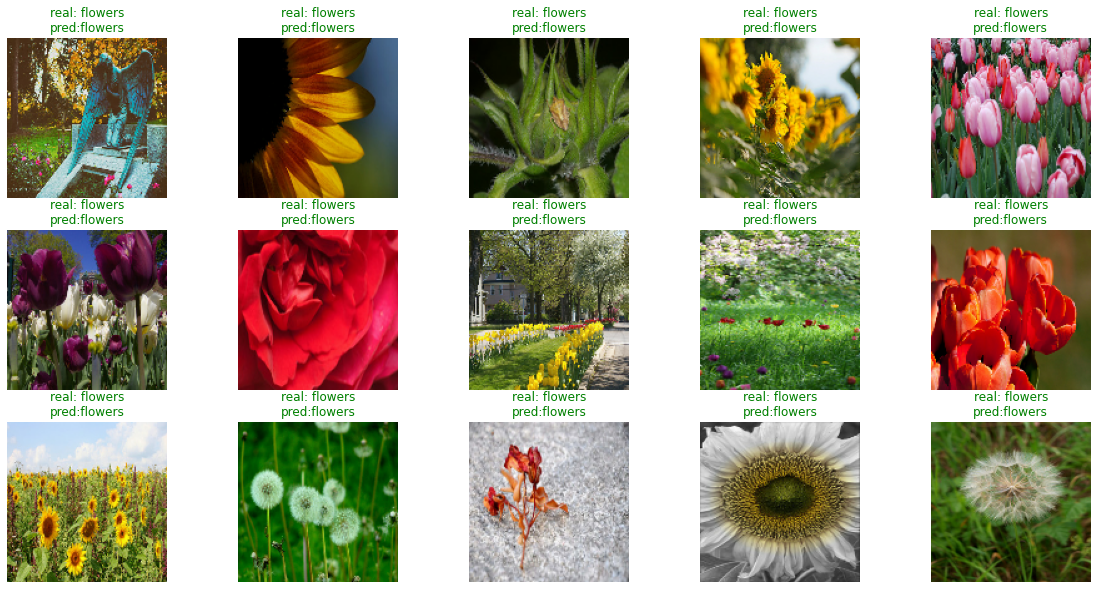

In [ ]:
plt.figure(figsize=(20, 10))
for images, labels in val_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        
        img_array = images[i].numpy().astype("uint8")
        prediction = model.predict(np.array([img_array]))
        prediction_name = classes[np.argmax(prediction)]
        real_name = classes[np.argmax(labels[i])]
        
        plt.imshow(img_array)
        if prediction_name == real_name:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'g'})
        else:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'r'})
        
        plt.axis("off")